In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import json
import os
import collections
import matplotlib.pyplot as plt
from pathlib import Path

# Plotting FIDs

In [2]:
## Just loading the fids
# location = "/usrhomes/g013/SemanticStyleGAN/fids/fids_v1.json"
# print(location)
# f = open(location)
# fids = json.load(f)
# print(fids)

In [2]:
#Funcrtiomn to sort a dictionary either based on keys or values
def save_sorted(location,sort_keys=True) -> dict:
    f = open(location)
    fids = json.load(f)
   
    if sort_keys:
        sorted_fids = sorted(fids.items(), key=lambda kv: kv[0])
    else:
        sorted_fids = sorted(fids.items(), key=lambda kv: kv[1])
    sorted_fids=collections.OrderedDict(sorted_fids)
   
    with open(location, 'w') as fp:
        json.dump(sorted_fids, fp)
    return sorted_fids

In [3]:
def plot_fids(location,save=False):
    sorted_fids=save_sorted(location,sort_keys=True)
    x_keys = np.fromiter(sorted_fids.keys(),dtype=float)/1000
    y_values = np.fromiter(sorted_fids.values(),dtype=float)
    plt.plot(x_keys,y_values)
    plt.yticks(np.arange(min(y_values),max(y_values),20))
    plt.xlabel("Iterations in Thousand")
    plt.ylabel("FID Values")
    plt.xticks(rotation='vertical')
    if save:
            location =Path(location)
            plt.savefig(str(location.parent/location.stem)+".png", bbox_inches='tight')
    else:
            plt.show()
    min_key = x_keys[np.where(y_values == np.amin(y_values))[0]][0]
    print(f" Minimum FID is {min(y_values)} at iteration {min_key}k")



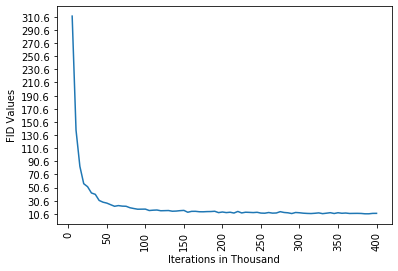

 Minimum FID is 10.6 at iteration 385.0k


In [6]:
#8 Local Generators
location = "../fids/fids_v2.2.json"
plot_fids(location,save=False)

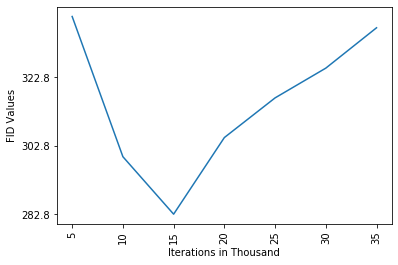

 Minimum FID is 282.8 at iteration 15.0k


In [6]:
location = "../fids/fids_v3.6.json"
plot_fids(location,save=False)

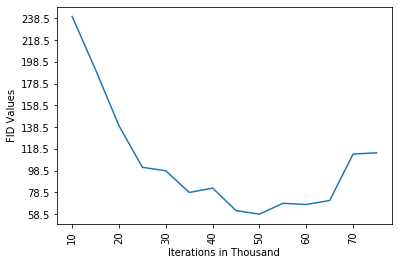

 Minimum FID is 58.54 at iteration 50.0k


In [7]:
#TTUR 0.001,0.002 d,g
location = "../fids/fids_v3.6_2.json"
plot_fids(location,save=False)

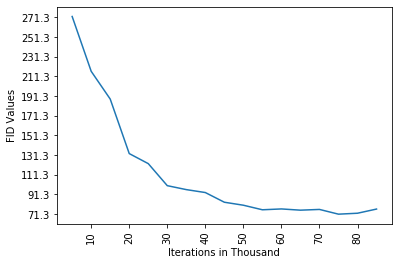

 Minimum FID is 71.34 at iteration 75.0k


In [5]:
#Normal LR with Augmentation
#This Addition did sort of do what we want, the task of making the learning task harder for disc. but 
#apparently we also made it too hard for the generator ... maybe set up the augmentation to be 
#easier with smaller probability
location = "../fids/fids_v3.6_3.json"
plot_fids(location,save=False)

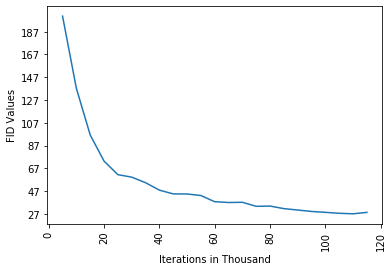

 Minimum FID is 26.91 at iteration 110.0k


In [5]:
location = "../fids/fids_v3.8.json"
plot_fids(location,save=False)

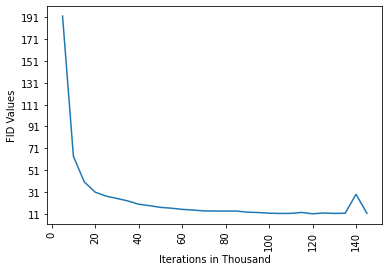

 Minimum FID is 11.0 at iteration 120.0k


In [7]:
location = "../fids/fids_v3.12.json"
plot_fids(location,save=False)

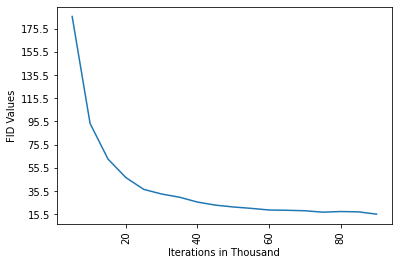

 Minimum FID is 15.47 at iteration 90.0k


In [4]:
location = "../fids/fids_v8.0.json"
plot_fids(location,save=False)